# SageMath Introdução

Este Notebook SageMath foi elaborado com o objetivo de familiarizar os alunos de graduação com a ferramenta SageMath, a fim de facilitar a compreensão e absorção dos conceitos relacionados a Grafos por meio da prática.

Nele, serão abordados diversos tópicos pertinentes ao estudo de Grafos, proporcionando uma ampla gama de conhecimentos sobre o tema.

**Tópicos**
- <a id="definicao">Definição e notação de grafo, exemplos de aplicações
- <a id="nome_da_ancora">Tipos de grafos</a>
    - <a id="nome_da_ancora">Vértices adjacentes</a>
    - <a id="nome_da_ancora">Laços e arestas paralelas</a>
    - <a id="nome_da_ancora">Grafos simples</a>
    - <a id="nome_da_ancora">pseudo-grafo</a> 
    - <a id="nome_da_ancora">multigrafos</a>
    - <a id="nome_da_ancora"> Gafos reflexivo, vazio, nulo e trivial</a>
    - <a id="nome_da_ancora">Hipergrafo</a>
    - <a id="nome_da_ancora">grau dos vértices, número de arestas</a>
    - <a id="nome_da_ancora">Grafos regulares, completos e bipartidos</a>
    - <a id="nome_da_ancora">Subgrafos e Clique</a>
    - <a id="nome_da_ancora">Grafos rotulados e valorados</a>
- Grafos planares
- Isomorfismo de grafos
- Algumas Operações com Grafos

# [Definição e notação de grafo, exemplos de aplicações](#definicao)
Um Grafo G = (V, E) é formado por dois conjutos discretos finitos e não vazios V e E, em que V é um conjunto finito e não vazio de vértices, e E é um conjunto definido em função dos elementos de V em que E pode assumir duas estruturas, Não Orientado (arestas), e Orientado (arcos). O SageMath nos dar a possibilidade de iniciarmos um grafo de forma bem ampla, através de:
- Matriz de Adjacência
- Dicionário
- Lista de Arestas

Entre outras... Utilizarei bastante neste Notebook a estrutura de Dicionário, pois acho mais conveniente em visualizar as relações entre vértices.

### Grafo Simétrico, Não Orientado ou somente GRAFO

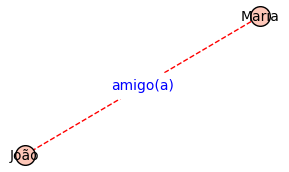

In [1]:
d = {'Maria': {'João': 'amigo(a)'}} # Maria é amiga de joão, assim como João é amigo de Maria.
G = Graph(d)
G.graphplot(edge_labels=True,
            color_by_label=True,
            edge_style='--'
           ).plot().show(figsize=[3, 3])

### Grafo Orientado, Assimétrico ou Dígrafo

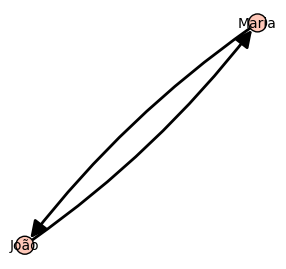

In [2]:
d = {'Maria': ['João'], 'João': ['Maria']} # Satisfaz a mesma relação de amizade vista anteriormente.
D = DiGraph(d)
D.plot().show(figsize=[3, 3])

### Vértices Vizinhos ou Adjacentes de um Grafo Simétrico

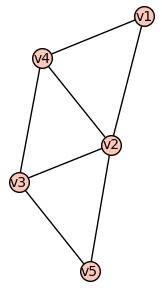

In [3]:
d = {'v1': ['v2', 'v4'], 'v2': ['v3', 'v4'], 'v3': ['v5', 'v4'], 'v5': ['v2']}
G = Graph(d)
G.plot().show(figsize=[3, 3])

- Os vizinhos do vértice v3 são: N(v3) = {v2, v4, v5}

In [4]:
G.neighbors('v3')

['v4', 'v5', 'v2']

### Vértices Vizinhos ou Adjacentes de um Dígrafo

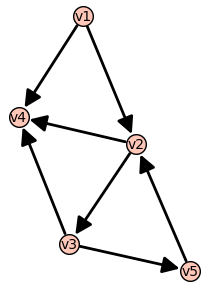

In [5]:
d = {'v1': ['v2', 'v4'], 'v2': ['v3', 'v4'], 'v3': ['v5', 'v4'], 'v5': ['v2']}
D = DiGraph(d)
D.plot().show(figsize=[3, 3])

- Os vizinhos, cujo arco incidem (atingem) o vértice v3: N⁻(v3) = {v2}

In [6]:
D.neighbors_in('v3')

['v2']

- Os vizinhos, cujos arcos que saem de v3 e são atingidos: N⁺(v3) = {v4, v5}

In [7]:
D.neighbors_out('v3')

['v5', 'v4']

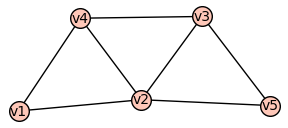

In [9]:
G.plot().show(figsize=[3, 3]) # O calculo foi feito a partir desse grafo.

### Laço (*loop*)

In [10]:
d = {'v1': ['v1']}
G = Graph(d)
G.has_loops() # Verifica se o grafo contém loops

True

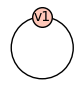

In [11]:
G.plot().show(figsize=[1, 1])

# Tipos de Grafos

## Grafo Simples
Seja G = (V, E) um grafo, G não possui laços ou arestas paralelas.

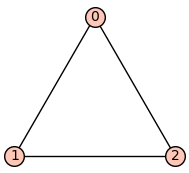

In [54]:
G = Graph(graphs.CompleteGraph(3))
G.plot().show(figsize=[2, 2])

## Digrafo Simples

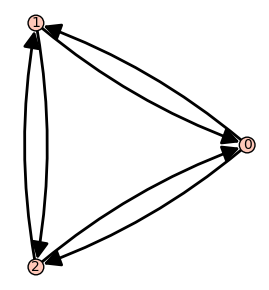

In [13]:
D = DiGraph(digraphs.Complete(3))
D.plot().show(figsize=[3, 3])

## Pseudo-Grafo
Seja G = (V, E) um grafo, G é um pseudografo se ele possuir no mı́nimo um laço.

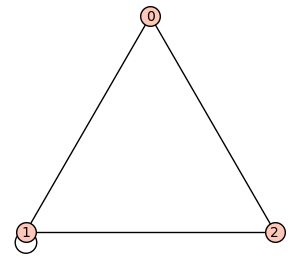

In [45]:
G = Graph(graphs.CompleteGraph(3))
G.allow_loops(True)
G.add_edge(1, 1)
G.plot(figsize=[3,3])

- Laço no vértice 1

## Multigrafo
Seja G = (V, E) um grafo não direcionado que possui no mı́nimo duas arestas paralelas, G é um multigrafo.

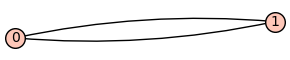

In [52]:
d = {0: [1, 1]}
G = Graph(d)
G.plot(figsize=[3, 3])

## Multigrafo Direcionado
Seja G = (V, E) um grafo direcionado que possui dois ou mais arcos na mesma direção e ligando os mesmos vértices, G é um multigrafo direcionado.

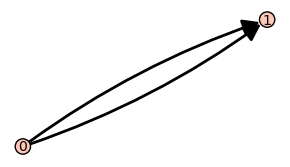

In [53]:
d = {0: [1, 1]}
G = DiGraph(d)
G.plot(figsize=[3, 3])

## Grafo Reflexivo
Seja G = (V, E) um pseudografo, G é um grafo reflexivo se todos os vértices possuı́rem um laço associado.

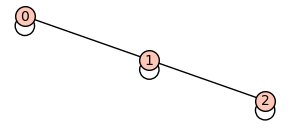

In [58]:
d = {0: [1], 1: [2],}
G = Graph(d, loops = True)
G.add_edges([(0, 0), (1, 1), (2, 2)])
G.plot(figsize=[3, 3])

## Grafo Vazio 
Seja G = (V, E) um grafo, G é vazio se contém somente vértices.

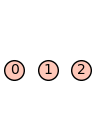

In [67]:
G = Graph()
G.add_vertices(range(3))
G.plot(figsize=[1.5,1.5])

## Grafo Nulo
Seja G = (V, E) um grafo, G é nulo se não possui vértices.

## Grafo Trivial 
Seja G = (V , A) um grafo, G é trivial se possuir somente um vértice.

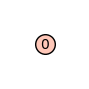

In [65]:
G = Graph(1)
G.plot(figsize=[1,1])

## Grau de um vértice
Seja G = (V, E) um grafo e v1 um vértice, o grau de v1 é **d(v1) = |N(v1)|**, é o número de arestas incidentes em v1.

Grau do vértice <2>: 6


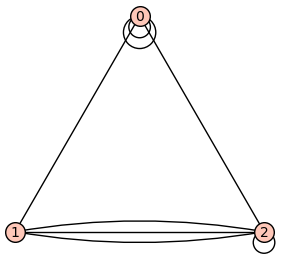

In [107]:
G = Graph(graphs.CompleteGraph(3), loops=True, multiedges=True)
G.add_edges([(0, 0), (0, 0), (1, 2), (1, 2), (2, 2)])
print(f"Grau do vértice <2>: {G.degree(2)}")
G.plot(figsize=[3, 3])

- **Obs.: No caso de grafos direcionados, é necessário considerar o grau de entrada (ou interno) e o grau de saı́da (ou externo).**

Saíndo do vértice <2>: 3
Incidindo no vértice <2>: 3


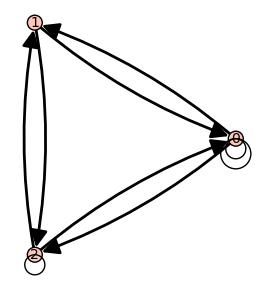

In [114]:
D = DiGraph(digraphs.Complete(3), loops=True, multiedges=True)
D.add_edges([(0, 0), (0, 0), (2, 2)])
print(f"Saíndo do vértice <2>: {G.out_degree(2)}\nIncidindo no vértice <2>: {G.in_degree(2)}")
D.plot(figsize=[3, 3])

## Número MÁXIMO de Arestas

O número máximo de arestas do Grafo: 6


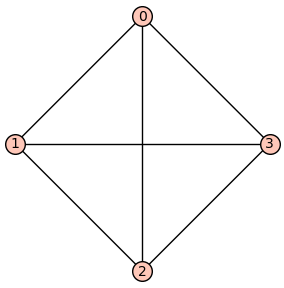

In [117]:
G = Graph(graphs.CompleteGraph(4))
N = len(G)
n_max_arestas = (N*(N - 1)) / 2
print(f"O número máximo de arestas do Grafo: {n_max_arestas}")
G.plot(figsize=[3, 3])

- Não é possível mais conectar um vértice ao outro, sem que o grafo deixe de ser Simples.

## Teorema do Aperto de mãos
Seja G = (V, E) um grafo não orientado com um número de arestas |E|, então:

∑v∈Vgrau(v) = 2|E|

In [153]:
e = 0
vertex_sum = len(G)

for v in G.degree():
    e += v

graus_dos_vertices = e / vertex_sum
print(f"Grau(v) = {graus_dos_vertices}")

Grau(v) = 3


- Calculo utilizando o Grafo Anterior como Exemplo
### Teorema
Um grafo não orientado tem um número par de vértices de grau ı́mpar

In [154]:
len(G)

4

## Grafo Completo
Seja um grafo simples G = (V, E) G é completo se todo par de vértices está ligado por uma aresta.

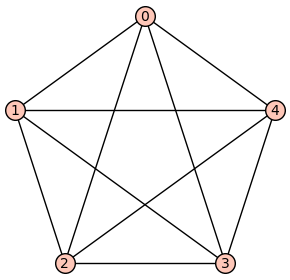

In [156]:
G = Graph(graphs.CompleteGraph(5))
G.plot(figsize=[3,3])

- Esse é o K5 e o do exemplo anterior é o K4.

## Grafo Bipartido
Seja um grafo **G = (V, E)**, **G** é um grafo bipartido se seu conjunto de vértices **V** pode ser particionado em dois subconjuntos **U** e **W** , tal que cada aresta de **G** está ligada a um vértice em **U** e um vértice em **W**.

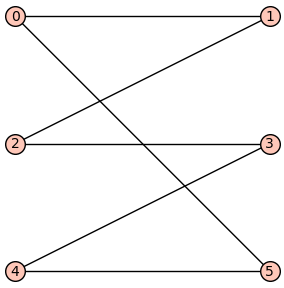

In [161]:
B = BipartiteGraph(graphs.CycleGraph(6))
B.plot(figsize=[3,3])

### Proposição
Seguindo a definição, um grafo bipartido não pode ter qualquer laço.

## Grafo Bipartido Completo
Seja um grafo simples **G = (V, E)**, **G** é um grafo bipartido completo se todo vértice em um subconjunto bipartido está ligado a todo vértice no outro conjunto bipartido.

### Notação
Denota-se **Km,n** um grafo completo bipartido contendo **m** vértices em um subconjunto bipartido e **n** vértices no outro subconjunto.

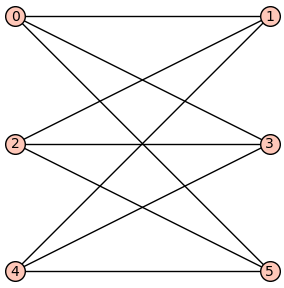

In [203]:
B = BipartiteGraph(graphs.CycleGraph(6))
BC = [ i for i in B.complement_bipartite().edge_iterator() ]
B.add_edges(BC)
B.plot(figsize=[3,3])

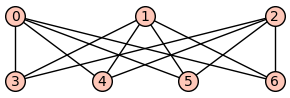

In [202]:
g = graphs.CompleteBipartiteGraph(3, 4)
g.plot(figsize=[3, 3])

## Grafo Regular
Seja um grafo G = (V, E), **G** é um grafo regular se todos os vértices possuirem o mesmo grau. 

### Notação
Denota-se k-regular um grafo de grau k comum a todos os vértices.

O grau médio de um Grafo Regular é igual ao grau de qualquer vértice: True
- Grafo Regular, você é regular?
- Sim, Sou!


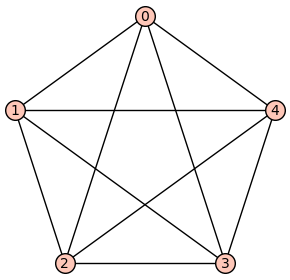

In [213]:
G = graphs.CompleteGraph(5)
print(f"O grau médio de um Grafo Regular é igual ao grau de qualquer vértice: {G.average_degree() == 4}")
print(f"- Grafo Regular, você é regular?")
print(f"- { 'Sim, Sou!' if G.is_regular() else 'Não!!'}")
G.plot(figsize=[3,3])

## Subgrafos
Sejam dois grafo **G = (V1, E1)** e **H = (V2 , E2)**, **H** é subgrafo de **G** quando os vértices e arestas de **H** estão em **G**, ou seja, V2 ⊆ V1 e A2 ⊆ A1 , e uma aresta (i, j) ∈ A2 se i, j ∈ V2 .

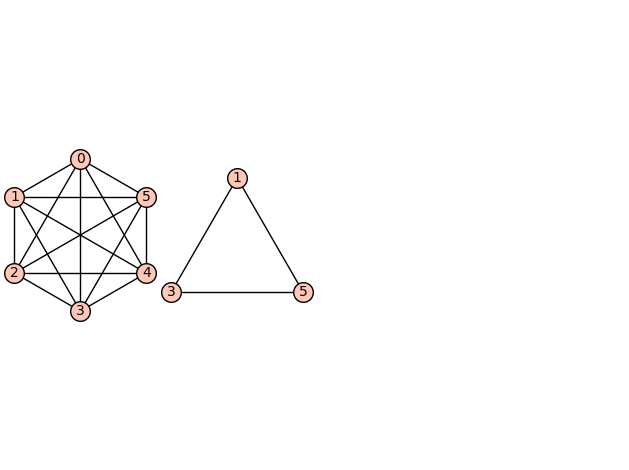

In [339]:
G = graphs.CompleteGraph(6)
H = G.subgraph([1, 3, 5])
show(G.plot(layout='circular'),
     H.plot(layout='circular'))

### Subgrafo Induzido (critério alternativo)
Seja **H = (V2, E2)** um subgrafo de **G = (V1, E1)**. **H** é um subgrafo induzido de **G** se uma aresta entre dois vértices de **V2** existe, se e somente se, essa aresta também existir entre dois vértices de **V1**.

Ou seja, contém todas as ligações que aparecem no grafo original sobre o mesmo conjunto de vértices.

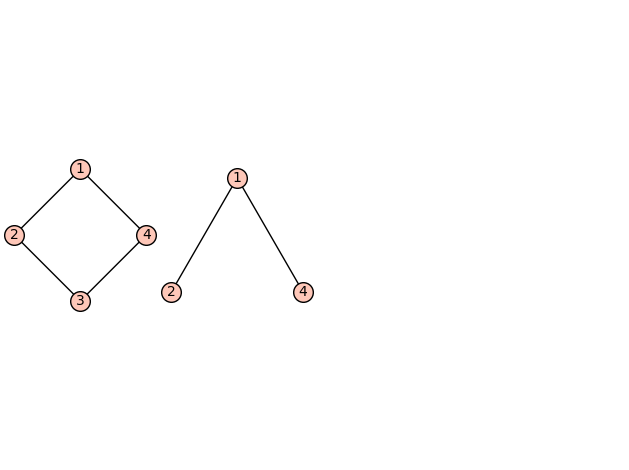

In [340]:
d = {1: [2, 4], 2: [3], 3: [4]}
G = Graph(d)
H = G.subgraph_search(Graph({1: [2, 4]}), induced=True); 
show(G.plot(layout='circular'),
     H.plot(layout='circular'))

In [345]:
print(f"H é subgrafo de G: {'Sim.' if H.is_subgraph(G) else 'Não!'}")

H é subgrafo de G: Sim.


### Subgrafo Abrangente (Gerador)
Seja **H = (V2, E2)** um subgrafo de **G = (V1, E1)**. **H** é um subgrafo abrangente de G se V1 = V2 . Ou seja, **E2 ⊆ E1**

### Clique
Seja um grafo G = (V, E), denota-se clique um subgrafo induzido de G que também é completo.

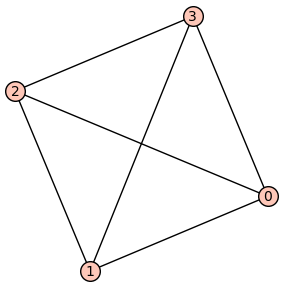

In [362]:
G = Graph()
G.add_clique(range(4))
G.plot(figsize=[3,3])

In [372]:
print(f"Os vizinhos do vértice <2> formam um clique?\n{'Sim' if G.subgraph(G.neighbors(2)).is_clique() else 'Não'}")

Os vizinhos do vértice <2> formam um clique?
Sim


In [382]:
list(sage.graphs.cliquer.all_cliques(G, 3, 3)) #lista todos os cliques

[[1, 2, 3], [0, 1, 2], [0, 1, 3], [0, 2, 3]]

### Clique Maximal
Um clique é maximal se ele não for um subgrafo próprio de nenhum outro.

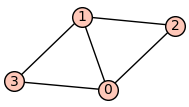

[[0, 1, 2], [0, 1, 3]]

In [392]:
G = Graph({0:[1,2,3], 1:[2], 3:[0,1]})
G.show(figsize=[2, 2])

In [393]:
print(f"Clique Maximal: {G.cliques_maximal()}")

Clique Maximal: [[0, 1, 2], [0, 1, 3]]


### Clique Máximo
Um clique é máximo se não houver outro com cardinalidade maior.

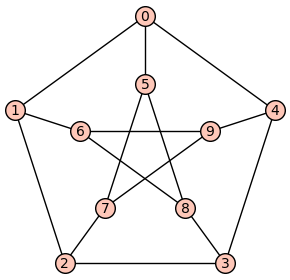

In [385]:
C = graphs.PetersenGraph()
C.plot(figsize=[3,3])

In [390]:
print(f"Clique Máximo: {C.clique_maximum()}")

Clique Máximo: [7, 9]


## Grafo Ponderado (ou Valorado)
Um grafo ponderado é um grafo onde cada aresta (ou vértice) é um atribuı́do um valor numérico, ou seja, o peso da aresta (ou do vértice).

In [463]:
count = 0
G = Graph(graphs.CompleteGraph(5))
for u,v,l in G.edges(sort=False):
    if G.edge_label(u, v) == None:
        G.set_edge_label(u, v, count)
        count += 1

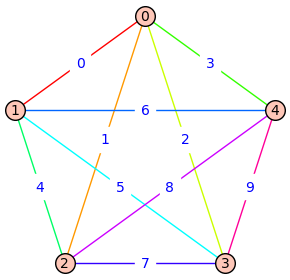

In [464]:
G.graphplot(edge_labels=True,
            color_by_label=True).plot().show(figsize=[3, 3])

## Grafo Rotulado
Seja um grafo G = (V, E), G é um grafo rotulado se cada vértice (ou aresta) possui uma identificação (ou rótulo).

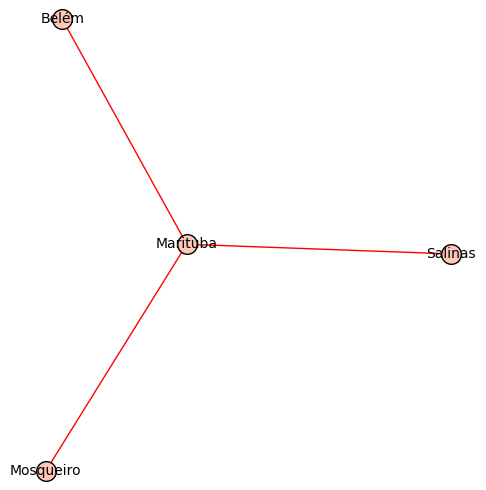

In [471]:
d = {"Marituba": ["Mosqueiro", "Belém", "Salinas"]}
G = Graph(d)
G.graphplot(color_by_label=True).plot().show(figsize=[5, 5])

# Isomorfismo